# <font color='#0B6231'> **Profit Price Prediction**

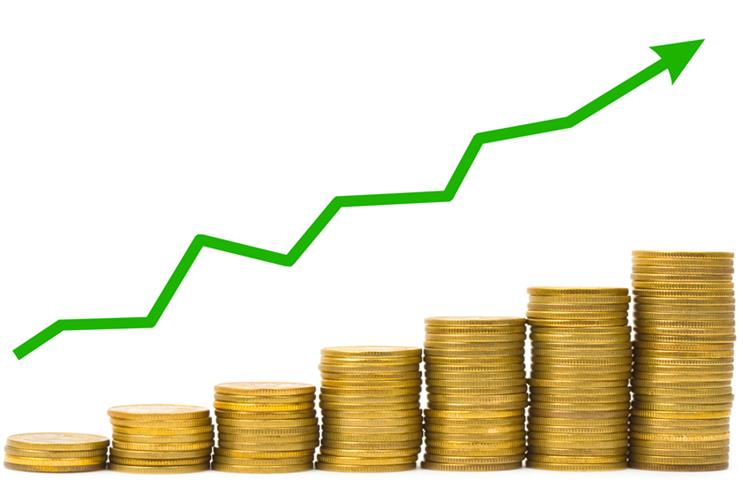

##  <font color='#0B6231'>Introduction
In this project, the goal is to build a machine learning model that predicts the profit of a company based on various features such as research and development (R&D) spending, administration costs, marketing expenses, and the state where the company operates. By analyzing these factors, we can identify the most important predictors of a company's profitability and create an effective model to forecast future profits.

##  <font color='#0B6231'>Dataset Explanation
The dataset contains the following columns:
- **R&D Spend**: The amount of money spent on research and development activities.
- **Administration**: The amount spent on administrative expenses.
- **Marketing Spend**: The budget allocated for marketing activities.
- **State**: The geographical location of the company (can be one of the states: New York, California, or Florida).
- **Profit**: The profit generated by the company.

##  <font color='#0B6231'>Aim
The aim of this project is to build a machine learning model to predict the **Profit** of a company based on the features **R&D Spend**, **Administration**, **Marketing Spend**, and **State**. By exploring the relationships between these variables and profit, we will develop a model that can help businesses forecast their profitability under different conditions.


## <font color='#0B6231'> Requirements

In [13]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',None)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import normalize, scale

## <font color='#0B6231'> Import Data

In [19]:
df=pd.read_csv('Startups.csv')

## <font color='#0B6231'> EDA (Exploratory Data Analysis)

In [21]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [23]:
df.shape

(50, 5)

In [25]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Administration,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing Spend,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [33]:
df['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

## <font color='#0B6231'> Data Visualization

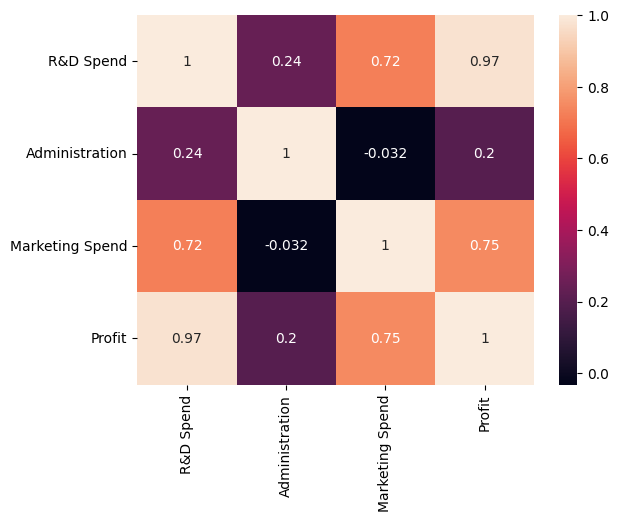

In [40]:
sns.heatmap(df.corr(numeric_only=True),annot=True);

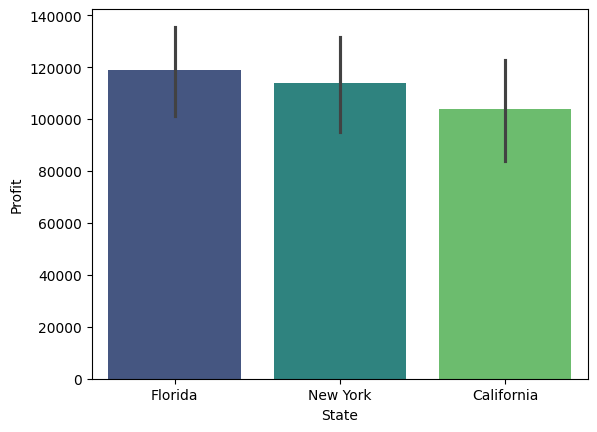

In [108]:
sns.barplot(x=df['State'],
            y=df['Profit'],
            palette='viridis',
            order=df.groupby('State')['Profit'].mean().sort_values(ascending=False).index);

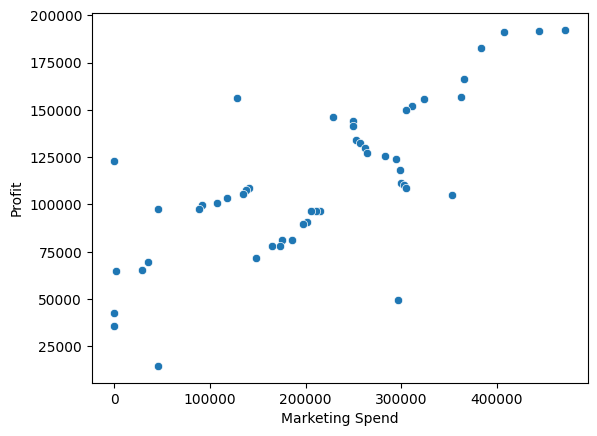

In [76]:
sns.scatterplot(x=df['Marketing Spend'],y=df['Profit'],palette='viridis');

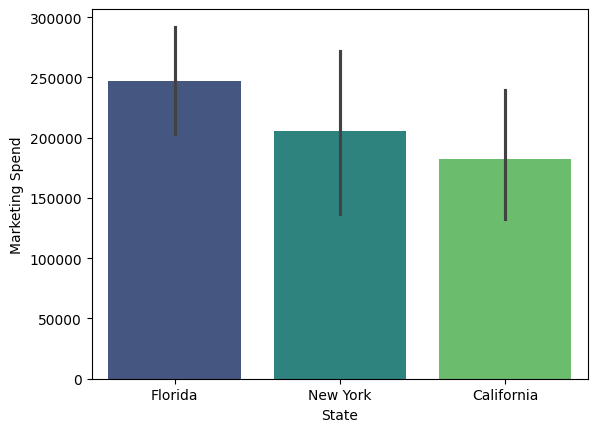

In [88]:
sns.barplot(x=df['State'],
            y=df['Marketing Spend'],
            palette='viridis',
            order=df.groupby('State')['Marketing Spend'].mean().sort_values(ascending=False).index);

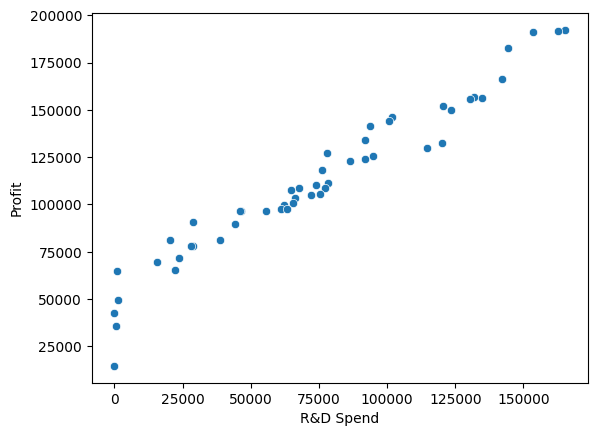

In [80]:
sns.scatterplot(x=df['R&D Spend'],y=df['Profit'],palette='viridis');

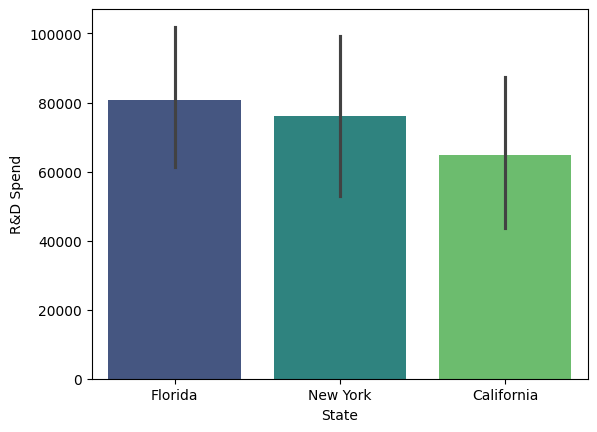

In [90]:
sns.barplot(x=df['State'],
            y=df['R&D Spend'],
            palette='viridis',
           order=df.groupby('State')['R&D Spend'].mean().sort_values(ascending=False).index);

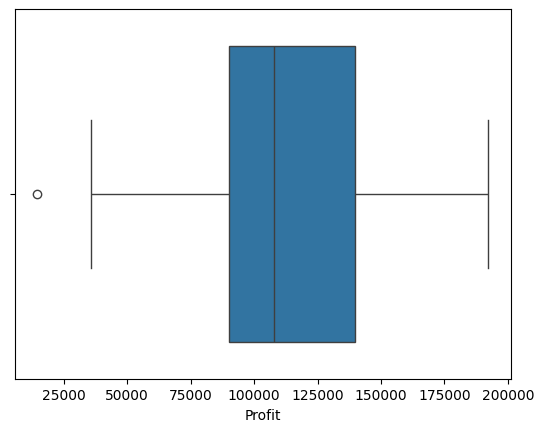

In [96]:
sns.boxplot(x=df['Profit']);

<Axes: xlabel='R&D Spend'>

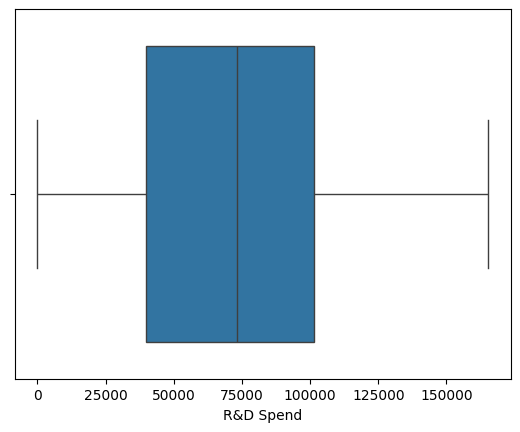

In [100]:
sns.boxplot(x=df['R&D Spend'])

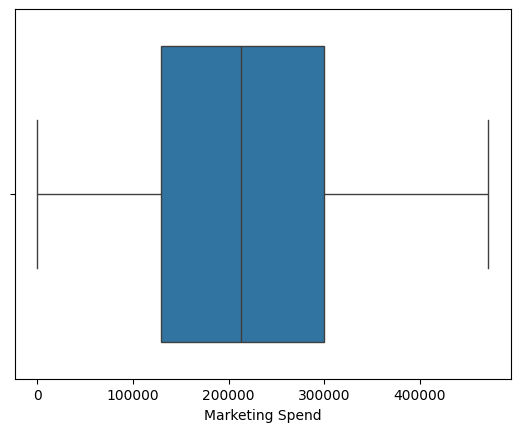

In [106]:
sns.boxplot(x=df['Marketing Spend']);

In [120]:
outliers=df.quantile(q=.03,numeric_only=True)
df=df[(df['Profit']>outliers['Profit'])]

## <font color='#0B6231'> Modelling

In [266]:
x=df.drop('Profit',axis=1)
y=df[['Profit']]

In [268]:
x.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State'], dtype='object')

In [260]:
x=pd.get_dummies(x,drop_first=True)

In [262]:
def regression_algo(x,y,plot=False):
    L=LinearRegression()
    R=Ridge()
    Lass=Lasso()
    E=ElasticNet()
    ETR=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    kn=KNeighborsRegressor()
    dt=DecisionTreeRegressor()
    xgb=XGBRegressor()
    rf=RandomForestRegressor()

    algos=[L,R,Lass,E,ETR,GBR,kn,dt,xgb,rf]
    algo_names=['Linear','Ridge','Lasso','ElasticNet','Extra Tree','Gradient Bossting','KNeighborRegressor','DecisionTreeRegressor','XGBReggressor','Random Forest Classifier']

    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

    r_squared=[]
    rmse=[]
    mae=[]

    result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)

    for algo in algos:
        p=algo.fit(x_train,y_train).predict(x_test)
        r_squared.append(r2_score(y_test,p))
        rmse.append(mean_squared_error(y_test,p)**0.5)
        mae.append(mean_absolute_error(y_test,p))

    result.R_Squared=r_squared
    result.RMSE=rmse
    result.MAE=mae

    r_table=result.sort_values('R_Squared',ascending=False)
    if plot:
        best_model = algos[r_squared.index(max(r_squared))]
        y_pred = best_model.predict(x_test)
        
        plt.figure(figsize=(10,6))
        plt.plot(y_test.reset_index(drop=True),label='Acutal Rent',color='green',linestyle='--')
        plt.plot(pd.Series(y_pred),label='Predicted Rent',color='red',linestyle='--')
        plt.xlabel('Predicted Rent')
        plt.ylabel('Actual Rent')
        plt.title('Actual vs Predicted Rent for Best Model')
        plt.legend()
        plt.show()
    return r_table

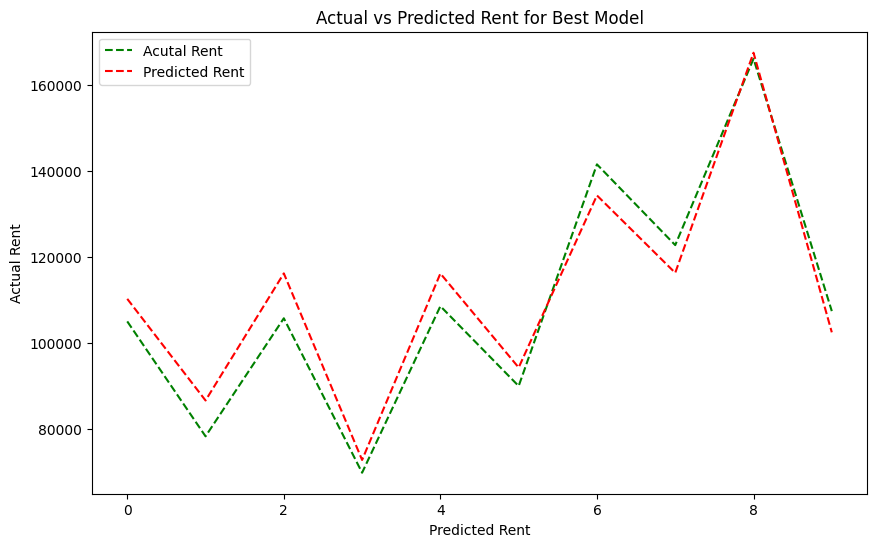

,R_Squared,RMSE,MAE
Gradient Bossting,0.944243,6422.385857,5899.011424
ElasticNet,0.927116,7342.846005,6696.531045
Ridge,0.925300,7433.787264,6629.013254
Lasso,0.924784,7459.373396,6612.852485
Linear,0.924769,7460.162491,6612.792849
Random Forest Classifier,0.915402,7910.938515,7012.784150
XGBReggressor,0.914042,7974.260031,6897.438625
Extra Tree,0.893845,8861.741225,7899.010000
DecisionTreeRegressor,0.807463,11934.529631,9603.210000
KNeighborRegressor,0.554097,18162.213074,11894.502400


In [264]:
regression_algo(x,y,plot=True)

## <font color='#0B6231'> Picking and Saving the Best Algorithm

In [135]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
GBR=GradientBoostingRegressor()
model = GBR.fit(x_train, y_train)
predictions = model.predict(x_test)
score=r2_score(y_test,predictions)
score

0.9405535316104137

In [137]:
import joblib
joblib.dump(model, 'best_regression_model.pkl')

['best_regression_model.pkl']

## <font color='#0B6231'>  Feature Importance

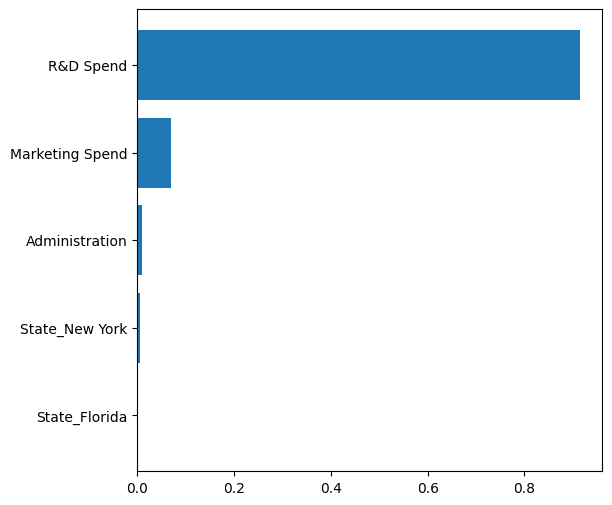

In [146]:
feature_importance = pd.DataFrame({'Feature': x_train.columns, 'Importance': GBR.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False).head(30)
plt.figure(figsize=(6,6))
plt.barh(feature_importance['Feature'],feature_importance['Importance'])
plt.gca().invert_yaxis()

## <font color='#0B6231'> Residuals Analysis

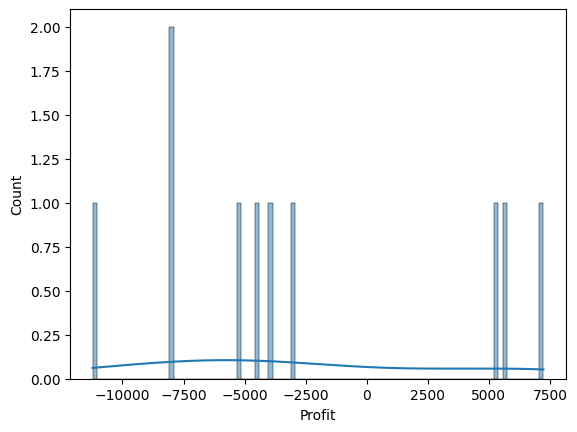

In [152]:
y_test = y_test.squeeze()
residuals= y_test - predictions
sns.histplot(residuals,bins=100,kde=True);

<Axes: xlabel='Profit', ylabel='Density'>

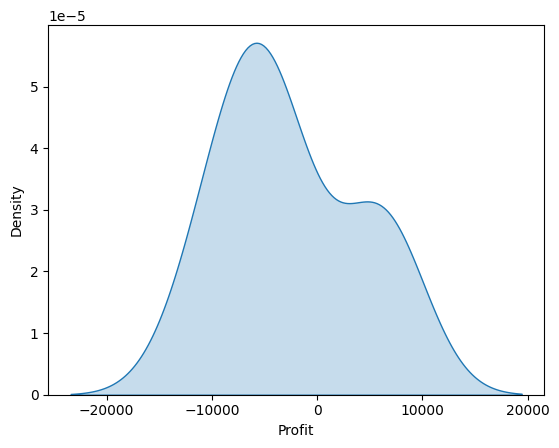

In [154]:
sns.kdeplot(x=residuals,fill=True)

## <font color='#0B6231'>Interpretation

- **Gradient Boosting** achieved the best performance with an **R-Squared** of 0.937553, indicating a strong fit to the data. It also had the lowest **RMSE** (6796.80) and **MAE** (6058.24), making it the most accurate model.
- **ElasticNet**, **Ridge**, and **Lasso** performed similarly well, with **R-Squared** values around 0.92, indicating good predictive power. These models, however, had slightly higher errors compared to Gradient Boosting.
- **XGBRegressor** also performed well, with an **R-Squared** of 0.914042, though it had a higher **RMSE** and **MAE** compared to the top models.
- **Random Forest Classifier** showed decent performance but had a slightly lower **R-Squared** and higher error metrics than **XGBRegressor**.
- **Extra Trees**, **DecisionTreeRegressor**, and **KNeighborRegressor** showed relatively poor performance, with **R-Squared** values significantly lower than 0.90, and high error metrics.

## <font color='#0B6231'>Conclusion

Based on the evaluation metrics, **Gradient Boosting** is the best performing model for predicting profit in this dataset, offering the highest **R-Squared** value and the lowest errors. The **ElasticNet**, **Ridge**, and **Lasso** models also showed strong performance, making them viable alternatives. Models such as **Random Forest Classifier**, **Extra Trees**, and **DecisionTreeRegressor** demonstrated lower predictive accuracy, suggesting that they might not be as suitable for this particular dataset. **KNeighborRegressor** was the least effective, showing poor performance across all metrics.

The results highlight the importance of choosing the right model for the dataset, with **Gradient Boosting** being the most promising model for profit prediction in this case.